**AIM 5011 - Fall 2021**

**Final Project Component - Late-Fusion Classifier**

**Aishwarya Singh**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
repo = os.path.dirname(os.path.abspath(''))

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
import tensorflow as tf
import keras as kr

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
tf.keras.backend.clear_session()
tf.random.set_seed(0)
np.random.seed(0)

Training Dataset:

In [7]:
text_df = pd.read_csv("https://raw.githubusercontent.com/codepharmer/AIM-5011-NLP-Final-Project/main/data/processed/Text_Processing_BERT_Facebook_data.csv").drop("Unnamed: 0", axis = 1)
image_df = pd.read_csv("https://raw.githubusercontent.com/codepharmer/AIM-5011-NLP-Final-Project/main/data/processed/Image_Processing_Facebook_data.csv").drop("Unnamed: 0", axis = 1)
object_df = pd.read_csv("https://raw.githubusercontent.com/codepharmer/AIM-5011-NLP-Final-Project/main/data/processed/Object_Recognition_Facebook_data.csv").drop("Unnamed: 0", axis = 1)

text_df

,id,text,label,prediction
0,08291.png,white people is this a shooting range,1,0
1,46971.png,bravery atits finest,1,1
2,03745.png,your order comes to and your white privilege d...,1,0
3,83745.png,it is time to send these parasites back to the...,1,1
4,80243.png,mississippi wind chime,1,0
...,...,...,...,...
12125,10423.png,nobody wants to hang,1,0
12126,98203.png,when god grants you a child after 20 years of ...,1,0
12127,36947.png,gays on social CUNFI Tettuality body positivit...,1,0
12128,16492.png,having a bad day you could be a siamese twin a...,1,1


In [8]:
image_df.drop("Unnamed: 0.1", axis = 1, inplace = True)

image_df

,image_name,label_true,predict_result
0,69351.png,1,1
1,79142.png,1,1
2,17843.png,1,1
3,27980.png,1,1
4,24537.png,1,1
...,...,...,...
12255,87246.png,0,0
12256,76254.png,0,0
12257,32416.png,0,1
12258,56812.png,0,1


In [9]:
object_df

,Name,hate,prediction
0,08291.png,1,0
1,46971.png,1,0
2,03745.png,1,0
3,83745.png,1,0
4,80243.png,1,0
...,...,...,...
12135,10423.png,1,0
12136,98203.png,1,0
12137,36947.png,1,0
12138,16492.png,1,0


In [10]:
dataset = text_df.merge(image_df, left_on = 'id', right_on = 'image_name')
dataset = dataset.merge(object_df, left_on = 'id', right_on = 'Name')

dataset

,id,text,label,prediction_x,image_name,label_true,predict_result,Name,hate,prediction_y
0,08291.png,white people is this a shooting range,1,0,08291.png,1,0,08291.png,1,0
1,46971.png,bravery atits finest,1,1,46971.png,1,1,46971.png,1,0
2,03745.png,your order comes to and your white privilege d...,1,0,03745.png,1,1,03745.png,1,0
3,03745.png,your order comes to and your white privilege d...,1,0,03745.png,1,1,03745.png,1,0
4,83745.png,it is time to send these parasites back to the...,1,1,83745.png,1,1,83745.png,1,0
...,...,...,...,...,...,...,...,...,...,...
12245,10423.png,nobody wants to hang,1,0,10423.png,1,0,10423.png,1,0
12246,98203.png,when god grants you a child after 20 years of ...,1,0,98203.png,1,1,98203.png,1,0
12247,36947.png,gays on social CUNFI Tettuality body positivit...,1,0,36947.png,1,1,36947.png,1,0
12248,16492.png,having a bad day you could be a siamese twin a...,1,1,16492.png,1,1,16492.png,1,0


In [11]:
dataset.drop(['image_name', 'label_true', 'Name', 'hate', 'text'], axis = 1, inplace = True)
dataset.rename({'prediction_x':'txt', 'predict_result':'img', 'prediction_y':'obj'}, axis = 1, inplace = True)

dataset

,id,label,txt,img,obj
0,08291.png,1,0,0,0
1,46971.png,1,1,1,0
2,03745.png,1,0,1,0
3,03745.png,1,0,1,0
4,83745.png,1,1,1,0
...,...,...,...,...,...
12245,10423.png,1,0,0,0
12246,98203.png,1,0,1,0
12247,36947.png,1,0,1,0
12248,16492.png,1,1,1,0


In [12]:
dataset.describe()

,label,txt,img,obj
count,12250.000000,12250.000000,12250.000000,12250.000000
mean,0.372490,0.239347,0.433143,0.077224
std,0.483488,0.426702,0.495530,0.266958
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


Validation Set:

In [13]:
text_val = pd.read_csv("https://raw.githubusercontent.com/codepharmer/AIM-5011-NLP-Final-Project/main/data/processed/Text_Processing_BERT_Validation_Set.csv").drop("Unnamed: 0", axis = 1)
image_val = pd.read_csv("https://raw.githubusercontent.com/codepharmer/AIM-5011-NLP-Final-Project/main/data/processed/Image_Processing_Validation_Set.csv").drop("Unnamed: 0", axis = 1)
object_val = pd.read_csv("https://raw.githubusercontent.com/codepharmer/AIM-5011-NLP-Final-Project/main/data/processed/Object_Recognition_Validation_Set.csv").drop("Unnamed: 0", axis = 1)

text_val

,id,text,label,prediction
0,10246724_747008182064474_2873398654888745189_n...,DONALD DUCK TEACHING SUBLIMINAL MESSAGES TO YO...,1,0
1,obama-meme.jpg,Sorry it took so long to get you a copy of my ...,1,0
2,alldone.png,YOU SLANDERED DEGRADED AND HUMILIATED ME IN FR...,1,0
3,brown.png,IF ITS YELLOW LET IT MELLOW IF BROWN FLUSH IT ...,1,0
4,patriots.png,In 2016 the American public realized that thei...,1,1
...,...,...,...,...
764,389ae57e1c001ec78fc84a56eb86060b.jpeg,THN BLACK FAST my sympathies are BLACK BLACK B...,1,0
765,421ba6b590f60e8ca14b864ef62b0937.jpeg,I WAS GOING TO SMOKE A JOINT WITH SOME MEXICAN...,1,0
766,8b0692fbb7b694714d9469223c3a365b.jpeg,Hispanic girliriends be like 02582 the last th...,1,0
767,3296e4cea44ab2cd64470be83d474b20.jpeg,My transgender friend keeps talking about suic...,1,1


In [14]:
image_val

,image_name,label_true,predict_result
0,truePundit.png,1,0
1,mikeFlynn.png,1,1
2,98f987d38e9dee5a3e8ba7f58b7bf358.jpeg,1,0
3,979f1e0c0f7a4a28b4e599cbe4773a67.jpeg,1,0
4,5f1d57f057eb99efd899e2e7ee609c16.jpeg,1,1
...,...,...,...
884,{785FDCFE-6CC2-4934-9673-03216E9D592A}.jpg,0,0
885,Drunk-Social-Media-infographic.jpg,0,0
886,magaPartyHat.png,0,1
887,creepyGuy.gif,0,0


In [15]:
object_val

,image_name,label,prediction
0,003a75cf599e9b24b6951f731eaee7d2.jpeg,0,0
1,027-funny-animal-pictures-with-captions-013-pa...,0,0
2,098f8e5f97e5668547e70ad803e27923--macros-shake...,1,0
3,0caa2605cd53a61310a948e08a9aedbc.png,1,0
4,0rockysuperman.jpg,0,0
...,...,...,...
883,zuckToileet.png,0,0
884,_ (4).jpg,0,0
885,_U63sfVLScNkSqg23X_7y9KmThRZM3FsQoocDonPMec.jpeg,0,0
886,{785FDCFE-6CC2-4934-9673-03216E9D592A} (1).jpg,0,0


In [16]:
val_set = text_val.merge(image_val, left_on = 'id', right_on = 'image_name')
val_set = val_set.merge(object_val, left_on = 'id', right_on = 'image_name')

val_set.drop(['image_name_x', 'label_true', 'image_name_y', 'label_y', 'text'], axis = 1, inplace = True)
val_set.rename({'prediction_x':'txt', 'predict_result':'img', 'prediction_y':'obj', 'label_x':'label'},
               axis = 1, inplace = True)

val_set

,id,label,txt,img,obj
0,10246724_747008182064474_2873398654888745189_n...,1,0,0,0
1,obama-meme.jpg,1,0,0,0
2,alldone.png,1,0,0,0
3,brown.png,1,0,0,0
4,patriots.png,1,1,0,0
...,...,...,...,...,...
765,421ba6b590f60e8ca14b864ef62b0937.jpeg,1,0,1,0
766,8b0692fbb7b694714d9469223c3a365b.jpeg,1,0,0,0
767,3296e4cea44ab2cd64470be83d474b20.jpeg,1,1,1,0
768,joy.png,1,0,0,0


In [17]:
val_set.describe()

,label,txt,img,obj
count,770.000000,770.000000,770.000000,770.0
mean,0.089610,0.071429,0.406494,0.0
std,0.285808,0.257707,0.491498,0.0
min,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,1.000000,0.0
max,1.000000,1.000000,1.000000,0.0


Model 1:

In [18]:
batch_size = 64

learning_rate = 0.01

number_of_epochs = 400

early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 10)

validation_split = 0.2

In [19]:
model1 = Sequential()
model1.add(Dense(15, activation = 'sigmoid', input_dim = 3))
model1.add(Dense(20, activation = 'sigmoid'))
model1.add(Dense(20, activation = 'sigmoid'))
model1.add(Dense(10, activation = 'sigmoid'))
model1.add(Dense(1, activation = 'sigmoid'))
print(model1.summary())

optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

model1.compile(loss = 'binary_crossentropy', metrics = ['acc'], optimizer = optimizer)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                60        
                                                                 
 dense_1 (Dense)             (None, 20)                320       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,021
Trainable params: 1,021
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
history1 = model1.fit(dataset[['txt', 'img', 'obj']],
                      dataset.label,
                      epochs = number_of_epochs,
                      batch_size = batch_size,
                      verbose = 2,
                      validation_split = validation_split,
                      shuffle = True,
                      callbacks = early_stopping)

Epoch 1/400
154/154 - 2s - loss: 0.5013 - acc: 0.7584 - val_loss: 0.4308 - val_acc: 0.8396 - 2s/epoch - 12ms/step
Epoch 2/400
154/154 - 1s - loss: 0.3999 - acc: 0.8467 - val_loss: 0.4264 - val_acc: 0.8396 - 644ms/epoch - 4ms/step
Epoch 3/400
154/154 - 1s - loss: 0.4006 - acc: 0.8467 - val_loss: 0.4255 - val_acc: 0.8396 - 625ms/epoch - 4ms/step
Epoch 4/400
154/154 - 1s - loss: 0.4012 - acc: 0.8467 - val_loss: 0.4271 - val_acc: 0.8396 - 590ms/epoch - 4ms/step
Epoch 5/400
154/154 - 1s - loss: 0.4002 - acc: 0.8467 - val_loss: 0.4277 - val_acc: 0.8396 - 630ms/epoch - 4ms/step
Epoch 6/400
154/154 - 1s - loss: 0.4003 - acc: 0.8467 - val_loss: 0.4271 - val_acc: 0.8396 - 635ms/epoch - 4ms/step
Epoch 7/400
154/154 - 1s - loss: 0.3999 - acc: 0.8467 - val_loss: 0.4263 - val_acc: 0.8396 - 647ms/epoch - 4ms/step
Epoch 8/400
154/154 - 1s - loss: 0.4000 - acc: 0.8467 - val_loss: 0.4261 - val_acc: 0.8396 - 633ms/epoch - 4ms/step
Epoch 9/400
154/154 - 1s - loss: 0.4005 - acc: 0.8467 - val_loss: 0.4303 -

In [21]:
train_pred1 = (model1.predict(dataset[['txt', 'img', 'obj']])).round()
test_pred1 = (model1.predict(val_set[['txt', 'img', 'obj']])).round()

train_pred1[0:10]

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

Training Data Confusion Matrix:


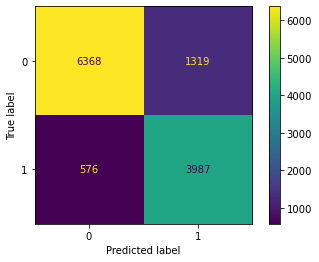

In [22]:
print("Training Data Confusion Matrix:")
figure = ConfusionMatrixDisplay(confusion_matrix(dataset.label, train_pred1))
figure.plot()
plt.show()

Holdout Data Confusion Matrix:


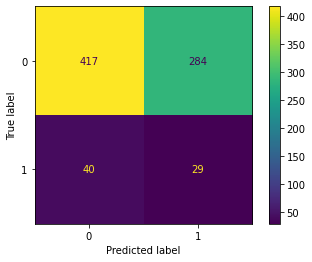

In [23]:
print("Holdout Data Confusion Matrix:")
figure = ConfusionMatrixDisplay(confusion_matrix(val_set.label, test_pred1))
figure.plot()
plt.show()

Model 2:

In [24]:
batch_size = 64

learning_rate = 0.0001

number_of_epochs = 400

early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 10)

validation_split = 0.2

In [25]:
model2 = Sequential()
model2.add(Dense(30, activation = 'relu', input_dim = 3))
model2.add(Dense(30, activation = 'relu'))
model2.add(Dense(30, activation = 'relu'))
model2.add(Dense(20, activation = 'relu'))
model2.add(Dense(10, activation = 'relu'))
model2.add(Dense(1, activation = 'relu'))
print(model2.summary())

optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

model2.compile(loss = 'binary_crossentropy', metrics = ['acc'], optimizer = optimizer)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 30)                120       
                                                                 
 dense_6 (Dense)             (None, 30)                930       
                                                                 
 dense_7 (Dense)             (None, 30)                930       
                                                                 
 dense_8 (Dense)             (None, 20)                620       
                                                                 
 dense_9 (Dense)             (None, 10)                210       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,821
Trainable params: 2,821
Non-traina

In [26]:
history2 = model2.fit(dataset[['txt', 'img', 'obj']],
                      dataset.label,
                      epochs = number_of_epochs,
                      batch_size = batch_size,
                      verbose = 2,
                      validation_split = validation_split,
                      shuffle = True,
                      callbacks = early_stopping)

Epoch 1/400
154/154 - 1s - loss: 0.7670 - acc: 0.6332 - val_loss: 0.6335 - val_acc: 0.6049 - 1s/epoch - 10ms/step
Epoch 2/400
154/154 - 1s - loss: 0.5166 - acc: 0.6652 - val_loss: 0.4820 - val_acc: 0.6857 - 766ms/epoch - 5ms/step
Epoch 3/400
154/154 - 1s - loss: 0.4312 - acc: 0.8423 - val_loss: 0.4345 - val_acc: 0.8396 - 773ms/epoch - 5ms/step
Epoch 4/400
154/154 - 1s - loss: 0.4076 - acc: 0.8467 - val_loss: 0.4284 - val_acc: 0.8396 - 763ms/epoch - 5ms/step
Epoch 5/400
154/154 - 1s - loss: 0.4031 - acc: 0.8467 - val_loss: 0.4287 - val_acc: 0.8396 - 766ms/epoch - 5ms/step
Epoch 6/400
154/154 - 1s - loss: 0.4018 - acc: 0.8467 - val_loss: 0.4278 - val_acc: 0.8396 - 774ms/epoch - 5ms/step
Epoch 7/400
154/154 - 1s - loss: 0.4009 - acc: 0.8467 - val_loss: 0.4273 - val_acc: 0.8396 - 767ms/epoch - 5ms/step
Epoch 8/400
154/154 - 1s - loss: 0.4003 - acc: 0.8467 - val_loss: 0.4269 - val_acc: 0.8396 - 797ms/epoch - 5ms/step
Epoch 9/400
154/154 - 1s - loss: 0.4000 - acc: 0.8467 - val_loss: 0.4260 -

In [27]:
train_pred2 = (model2.predict(dataset[['txt', 'img', 'obj']])).round()
test_pred2 = (model2.predict(val_set[['txt', 'img', 'obj']])).round()

Training Data Confusion Matrix:


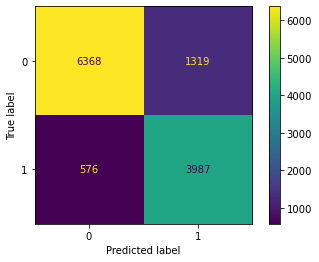

In [28]:
print("Training Data Confusion Matrix:")
figure = ConfusionMatrixDisplay(confusion_matrix(dataset.label, train_pred2))
figure.plot()
plt.show()

Holdout Data Confusion Matrix:


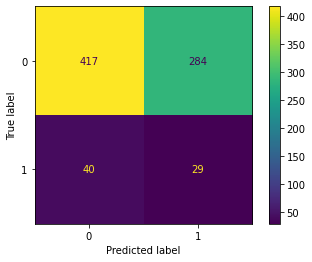

In [29]:
print("Holdout Data Confusion Matrix:")
figure = ConfusionMatrixDisplay(confusion_matrix(val_set.label, test_pred2))
figure.plot()
plt.show()